Introduction
In this assignment, you are going to use TensorFlow/Keras deep learning library to build various
neural network models for classification and regression tasks on image datasets.
You are advised to use the following textbook which contains a large variety of practical examples
of the Keras API as a reference.
Aurelien Geron: Hands-on Machine Learning with Scikit-learn, Keras and Tensorflow, Edition #2
The key objectives of this assignment:
•Learn how to define and train simple neural networks in Keras.
•Gain practical experience by comparing various MLP and CNN architectures, getting some intuitions
for manually tuning hyperparameters and their effects on model performance.
•Apply this knowledge to develop a more complex CNN for the “tell-the-time” problem.
Note: This assignment is going to be heavy in terms of computational requirements, therefore you are
recommended to find a suitable platform with GPU acceleration to train your models. We recommend the
following options:
1. Using the computers in the lab rooms. You can check out the General information → Instructions on
Brightspace on how to connect to the lab computers remotely.
2. Google Colab/DeepNote with TPU/GPU acceleration. To change your runtime type on Colab go to
Runtime → Change runtime type → Select ’TPU’ or ’GPU’ option.
3. If you have a laptop with an NVidia GPU or a high-end CPU you can potentially complete every-
thing on your own device. TensorFlow/Keras setup instructions will differ based on your OS/system
(instructions)

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__


2025-10-15 13:42:32.976303: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-15 13:42:32.983756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760528552.993445   23353 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760528552.996308   23353 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760528553.003545   23353 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

'3.11.2'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/home/ollie/anaconda3/envs/idl/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1760528593.251090   23353 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6119 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid))

Epoch 1/30


I0000 00:00:1760528670.816598   23461 service.cc:152] XLA service 0x711890003d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760528670.816628   23461 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-10-15 13:44:30.825813: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1760528670.856776   23461 cuda_dnn.cc:529] Loaded cuDNN version 90101
2025-10-15 13:44:31.341227: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_40_0', 120 bytes spill stores, 120 bytes spill loads

2025-10-15 13:44:31.388392: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fus

 196/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.4246 - loss: 1.8314

I0000 00:00:1760528672.952359   23461 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1697/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.6866 - loss: 1.0144

2025-10-15 13:44:34.780918: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_40', 100 bytes spill stores, 100 bytes spill loads

2025-10-15 13:44:34.893270: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_40', 200 bytes spill stores, 200 bytes spill loads

2025-10-15 13:44:34.920445: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_40_0', 120 bytes spill stores, 120 bytes spill loads

2025-10-15 13:44:34.934395: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_40', 64 bytes spill stores, 64 bytes spill loads

2025-10-15 13:44:35.062378: I external/l

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - loss: 1.0106  

2025-10-15 13:44:37.479262: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 112 bytes spill stores, 112 bytes spill loads

2025-10-15 13:44:37.480418: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 820 bytes spill stores, 864 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7696 - loss: 0.7157 - val_accuracy: 0.8224 - val_loss: 0.5253
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.8313 - loss: 0.4859 - val_accuracy: 0.8416 - val_loss: 0.4483
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.8452 - loss: 0.4430 - val_accuracy: 0.8598 - val_loss: 0.4145
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.8546 - loss: 0.4154 - val_accuracy: 0.8624 - val_loss: 0.3975
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.8609 - loss: 0.3959 - val_accuracy: 0.8562 - val_loss: 0.4083
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8668 - loss: 0.3797 - val_accuracy: 0.8702 - val_loss: 0.3733
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.8710 - loss: 0.3661 - val_accuracy: 0.8658 - val_loss: 0.3753
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.8738 - loss: 0.3551

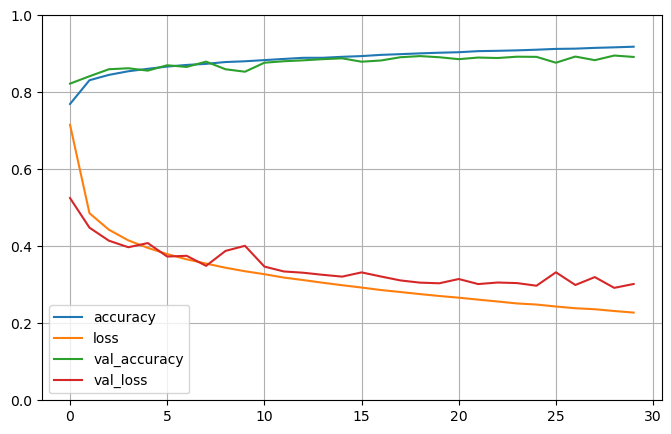

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [13]:
model.evaluate(X_test, y_test)

269/313 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.8405 - loss: 72.2187

2025-10-15 13:47:51.310926: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37', 104 bytes spill stores, 104 bytes spill loads

2025-10-15 13:47:51.607015: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37', 808 bytes spill stores, 852 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8354 - loss: 74.9061 


[74.90613555908203, 0.8353999853134155]

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20


/home/ollie/anaconda3/envs/idl/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7858 - val_loss: 0.5517
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9657 - val_loss: 0.4967
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.5445 - val_loss: 0.4746
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.4585 - val_loss: 0.4450
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.4488 - val_loss: 0.4430
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4364 - val_loss: 0.4286
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.4196 - val_loss: 0.4196
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4113 - val_loss: 0.4138
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4053 - val_loss: 0.4079
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3998 - val_loss: 0.3999
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.3966 - val_loss: 0.3975
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/st

In [19]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [22]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.4741 - val_loss: 1.0558
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9456 - val_loss: 0.7434
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7268 - val_loss: 0.6613
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6575 - val_loss: 0.6170
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6182 - val_loss: 0.5900
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.5899 - val_loss: 0.5661
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5677 - val_loss: 0.5536
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5513 - val_loss: 0.5349
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5363 - val_loss: 0.5234
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5265 - val_loss: 0.5154
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5165 - val_loss: 0.5092
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [23]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [24]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [25]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 1.3828 - loss: 0.8831 - main_output_loss: 0.8274 - val_aux_output_loss: 1.0364 - val_loss: 0.5405 - val_main_output_loss: 0.4854
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_output_loss: 1.0091 - loss: 0.5647 - main_output_loss: 0.5155 - val_aux_output_loss: 0.9471 - val_loss: 0.5187 - val_main_output_loss: 0.4711
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_output_loss: 0.8989 - loss: 0.5280 - main_output_loss: 0.4867 - val_aux_output_loss: 0.8385 - val_loss: 0.4898 - val_main_output_loss: 0.4511
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_output_loss: 0.8105 - loss: 0.4886 - main_output_loss: 0.4526 - val_aux_output_loss: 0.7634 - val_loss: 0.4725 - val_main_output_loss: 0.4402
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_output_loss: 0.7501 - loss: 0.4740 - main_output_loss: 0.4433 - val_aux_output_loss: 0.6978 - val_loss: 0.4587 - val_main_output_loss: 0.4321


In [26]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_loss: 0.4837 - loss: 0.3697 - main_output_loss: 0.3568


In [27]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [28]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()